* Perform a similar analysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, number of features, number of classes, data-points per class.
* Explain our objective.
* Perform Univariate analysis(PDF, CDF, Boxplot, Violin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classification.
* Write your observations in English as crisply and unambiguously as possible. Always quantify your results.


# Information on Haberman Dataset.
* Haberman Dataset is related to breast cancer.
* The dataset tells the survival of patients who had undergone surgery for breast cancer.
* The dataset is related to the study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital

# Information on Dataset.
* The dataset has three hundred and six rows of data.
* It contains values for multiple fields, which are defined by columns names
* The columns are as follow:
* Age of patient at time of operation (numerical),
* Patient's year of operation (year - 1900, numerical),
* Number of positive axillary nodes detected (numerical),
* Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

* Here I wanted to shed some light on positive axillary nodes, meaning what this data means:
* A positive axillary lymph node is a lymph node in the area of the armpit (axilla) to which cancer has spread. This spread is determined by surgically removing some of the lymph nodes and examining them under a microscope to see whether cancer cells are present.
* So, after undergoing surgery and getting removed lymph nodes, how many people survived for 5 years or more or less than 5 years
* So, we need to explore on this data to understand more of people survival

* To start with data analysis, we need to first load the data and perform some basic checks
* Have written some SQL to understand the data before I start with coding
* Some of the below SQL have written are as follows, have added the comments also for each SQL statements
* have downloaded the data from (https://www.kaggle.com/gilsousa/habermans-survival-data-set) site 
* Installed MySQL and created table and load data to that table and started to analysis the data

* Create table

* You can perform this kind of basic check if you come from SQL background and so as you can map things when you code them,
* So, let’s begin with EDA



In [1]:
#All the required import statments:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv(r"C:\Users\SACHEEN\Downloads\haberman.csv")
#Now the data is loaded to the haberman varibale

In [2]:
#To view the sample data set 
#Usage Head : top rows Tail: last rows
print(haberman.head())

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


In [3]:
#data-points and features
print(haberman.shape)
# rows(data points) -> 306 && features(age,year,nodes,status) 

(306, 4)


In [4]:
#column names in our dataset
print (haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [5]:
#(Q) How many data points for each class are present? 
#(or) what is survival status counts for people who survived for 5 years or more or less
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

# Observation 

* So executing above statement we got to know that there are 225 patients who have survived for more than 5 years and 81 patients who have survived less than 5 years.

# Bi-variate analysis (scatter plots, pair-plots) 

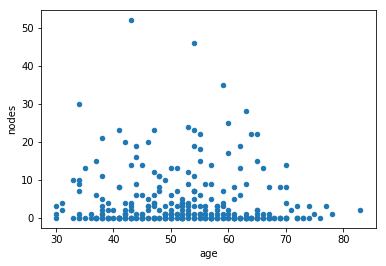

In [6]:
#As have written sql statmets and have seens the stats parts, lets visualise the data
#Visualise the data using 2-D scatter plot:
#ALWAYS understand the axis: labels and scale.
haberman.plot(kind="scatter", x='age', y='nodes')
#plt.grid()
plt.show()
#haberman['age'].value_counts()


# Observations

* The above scatter plot shows the data in the overlap fashion, and the color is also same when we are trying to distinguish/differentiate different age group.
* But we can see more zero axillary lymph nodes across all the age group.
* The count for individual age for the data residing at zero can be taken to understand which age contributes the most (max & min)

In [7]:
#haberman['nodes'].value_counts()

* So, to distinguish between the data we can use seaborn packages function which simply to distinguish data visually by allocating different colors to every classification feature.

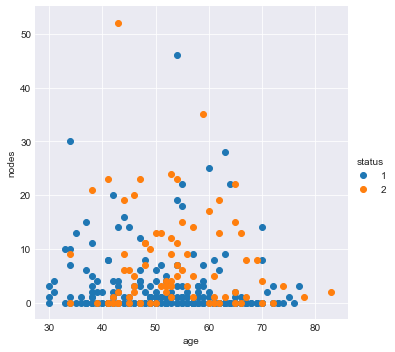

In [8]:
sns.set_style("darkgrid")
#sns.FacetGrid(haberman,hue="age",size=5) \
sns.FacetGrid(haberman,hue="status",size=5) \
    .map(plt.scatter,"age","nodes") \
    .add_legend();
plt.show()

# Observations

* The x axis is the age and y axis is the number of lymph nodes
* The data that is distributed on the x axis is in age group of ten, you can use simple case statements to check the counts as used above specifying the age group of each in case statements
* We have already seen that the data is imbalanced with 225 points having the survival status of 1 and 2 with 81 data points
* And looking at the graph we can’t make any simple if else statements
* But just looking at the age of 30 and less than 31 or 33 we can see some points having survival status of 1


In [9]:
"""
age	year	nodes	status
30	65	0	1
33	60	0	1
"""

'\nage\tyear\tnodes\tstatus\n30\t65\t0\t1\n33\t60\t0\t1\n'

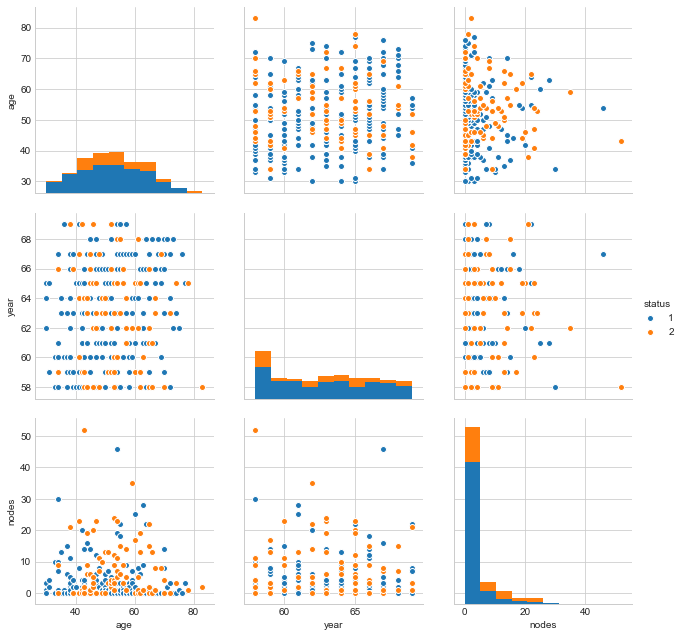

In [10]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", size=3,vars=['age','year', 'nodes'])
plt.show()

* #sns.pairplot(haberman, hue="status", size=3);
* #when we plot using status as our axis the data is not making any sense so let’s omit that data set from this

# Observations

* The pair plots are not making any sense when plotted 
* As we can see that in each plot with different axis comparison data is completely overlapping
* Plot 1, 5 and  9 are the histograms of all combinations of features which explain you the density of data by considering different features of data


* NODES(x-axis) vs AGE(y-axis) or AGE(x-axis) vs NODES(y-axis) are the same plot on 3 and 7
* Just the feature interchange on its axis so the plot will rotate by 90 degree
* Similarly, the plot for other axis are not making any sense and they also get a rotate of 90 degree when features are cross 
 exchanged 
* Will use plot 3 as further plot in Univariate analysis (PDF, CDF, Boxplot, Violin plots) as this is making some sense even though there are overlapped data present


# Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) 

* Will use the NumPy library to plot the 1-D scatter plot using just one feature
* We are mainly concerned on AGE and NODES, Because the survival status data can be seen more considerable in the visualization
* so, let’s import the library and start with 1-D scatter plots


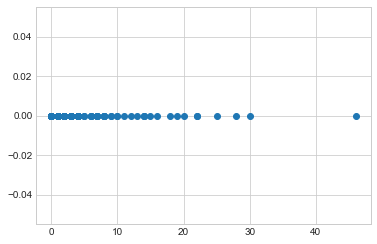

In [11]:
haberman_survival_5 = haberman.loc[haberman.status == 1]
haberman_survival_2 = haberman.loc[haberman.status == 2]
#haberman_survival_5.columns
plt.plot(haberman_survival_5['nodes'],np.zeros_like(haberman_survival_5['nodes']),'o')
plt.show()

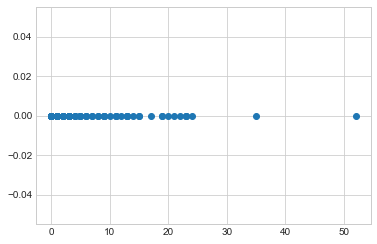

In [12]:
#haberman_survival_2.columns
plt.plot(haberman_survival_2['nodes'],np.zeros_like(haberman_survival_2['nodes']),'o')
plt.show()

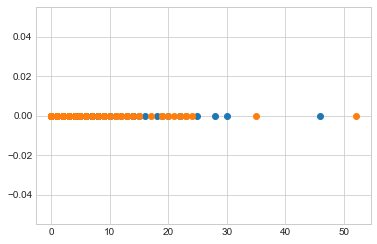

In [13]:
plt.plot(haberman_survival_5['nodes'],np.zeros_like(haberman_survival_5['nodes']),'o')
plt.plot(haberman_survival_2['nodes'],np.zeros_like(haberman_survival_2['nodes']),'o')
plt.show()

# Observations

* Have first plotted them individually to see how they look when data is spread on single feature
* Can be seen that will get overlapped for sure
* Plotting them together and check for overlapping of the data
* So even this do will still leave us clue less on distinguishing
* Age is even worse data when plotted as 1-D scatter, can be seen it is completely overlapped

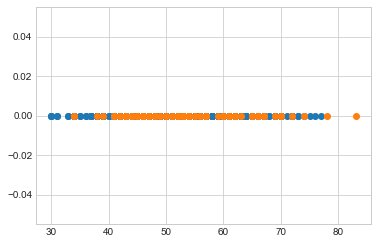

In [14]:
plt.plot(haberman_survival_5['age'],np.zeros_like(haberman_survival_5['age']),'o')
plt.plot(haberman_survival_2['age'],np.zeros_like(haberman_survival_2['age']),'o')
plt.show()

# Observations

* To start with PDF and CDF lets begin with histogram plot and KDE as done above
* The histogram will help us to understand the count for that particular feature
*  The idea is to locally represent the data density by counting the number of observations in a sequence of consecutive intervals (bins) 
* KDE aim is to find probability density function (PDF) for a given dataset
* It smooths the around values of PDF


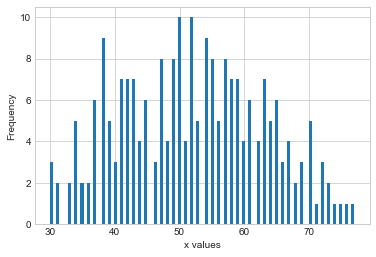

In [15]:
haberman_survival_5 = haberman.loc[haberman['status']==1]
haberman_survival_2 = haberman.loc[haberman['status']==2]
haberman_survival_5.columns
haberman_survival_2.columns
plt.hist(haberman_survival_5.age,bins=100)
plt.ylabel('Frequency')
plt.xlabel('x values')
plt.show()

(array([12., 24., 28., 21., 37., 37., 21., 25., 14.,  6.]),
 array([30. , 34.7, 39.4, 44.1, 48.8, 53.5, 58.2, 62.9, 67.6, 72.3, 77. ]),
 <a list of 10 Patch objects>)

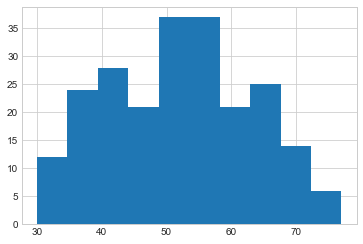

In [16]:
plt.hist(haberman_survival_5.age)

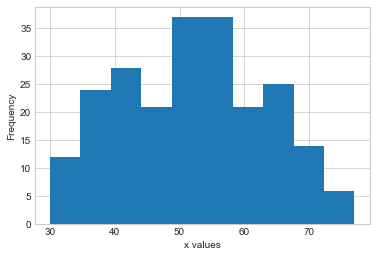

In [17]:
plt.hist(haberman_survival_5.age)
plt.ylabel('Frequency')
plt.xlabel('x values')
plt.show()

# Observation 

* The graphs above display different histograms
* There is a difference in line bar (Blue Lines) and bar (Green Bars) graph of the histogram
* Observation is that when you plot with bins= 100 it tries to come the with individual line bars on the x axis for each age group
* On Y axis you can observer the relative count, and this is what have explained in introduction of PDF and CDF
* When you just run the command for ["plt.hist(haberman_survival_5.age)"] it displays you the sum of the age groups 
* like for say if take the age group for [30,34] then it will give you the total sum of 12, this the sum of individual count on the line bar graph ([age->count][30->3][31->2][33->2][34->5]), 
* Take a look of this counts on line graph ([age->count] [30->3][31->2][33->2][34->5])
* So this sum is displayed in bar graph(green color)

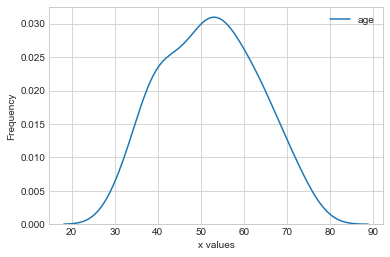

In [18]:
haberman_survival_5 = haberman.loc[haberman['status']==1]
haberman_survival_2 = haberman.loc[haberman['status']==2]
haberman_survival_5.columns
haberman_survival_2.columns
sns.kdeplot(haberman_survival_5.age)
plt.ylabel('Frequency')
plt.xlabel('x values')
plt.show()

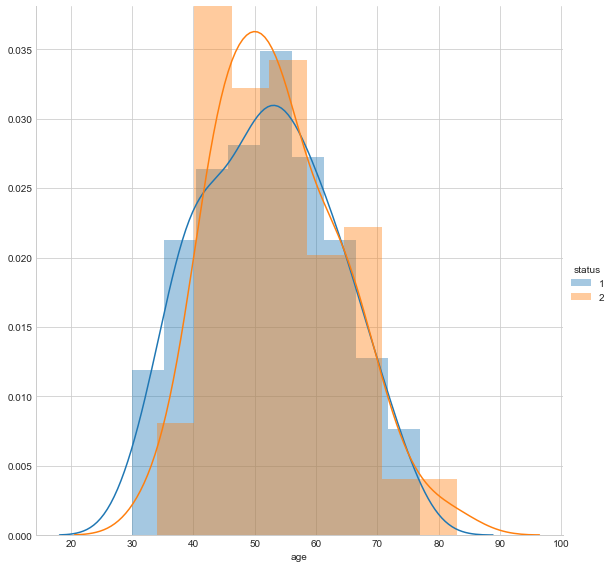

In [19]:
sns.FacetGrid(haberman,hue="status", size=8)\
    .map(sns.distplot,"age") \
.add_legend()
plt.show();

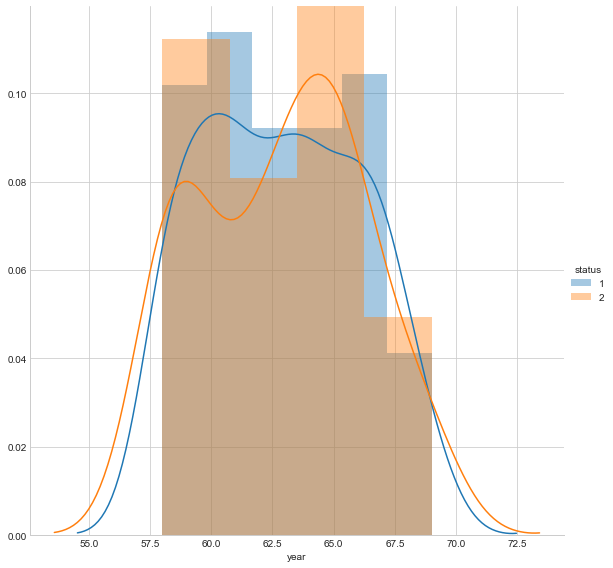

In [20]:
sns.FacetGrid(haberman,hue="status", size=8)\
    .map(sns.distplot,"year") \
.add_legend()
plt.show();

# Observations

* When plotted above histograms for age and year to distinguish the below
* WRT to age, wanted to know what age group of people has survived more when compared to other age group
* And WRT to year, which years has a good survival rate
* Seeing the data now it is difficult to make conclusion on the above statements


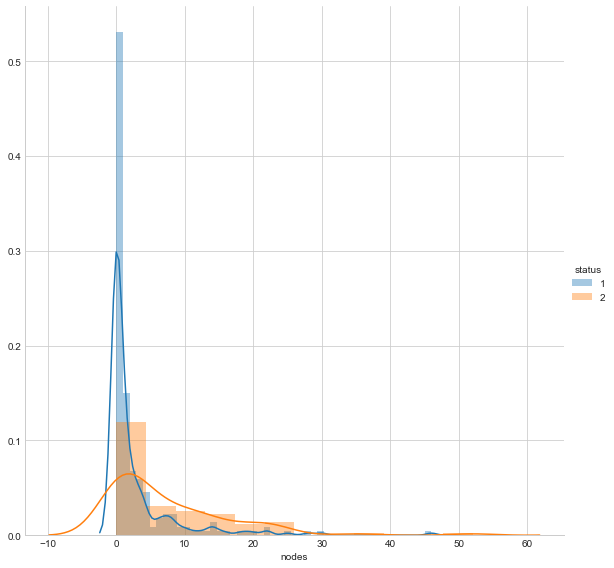

In [21]:
sns.FacetGrid(haberman,hue="status", size=8)\
    .map(sns.distplot,"nodes") \
.add_legend()
plt.show();

# Observations

* This data/ graph is giving some sense in it, not completely can still be seen overlap
* But this is some kind of relief can be said
* Here we have chosen the nodes (lymph positive nodes) to distinguish the data
* Here we can see that there is no overlap in dataset until the zero nodes or till zero nodes
* So, we can say that people with no lymph or with zero lymph has long survival rate
* We can come with the simple if-else model to distinguish this data


# CDF

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


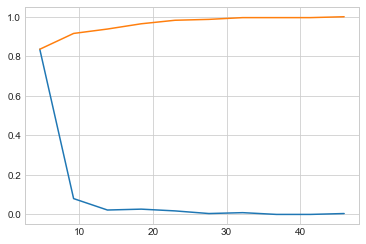

In [22]:
#Plot CDF of nodes

counts, bin_edges = np.histogram(haberman_survival_5['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(haberman_survival_5['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
#plt.plot(bin_edges[1:],pdf);

plt.show();

# Observation

* First take the max of node
* Here we have max of node is 46
* The data is been divided in bins of 10 for the values ranging from 0 to 46 [  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]
* Then data is selected for every group of bins (ex [0,4.6])
* Then take the individual count of that group and sum all the data that you got after you did a count on each individual group, then divide each group count by total sum
* this gives you the percentage of each group that survived 
* from the above graph we can see the first peak of the graph which shows around 0.83555556 percent for the node group of first
* so, we can say there is an 85% chance of long survival if number of axillary nodes detected are < 4.
* Also, we can see as the group of node increases the percentage is reducing, means clearly we can say that 85% of people have chance of survival with less lymph nodes as nodes increases the survival rate decreases


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]


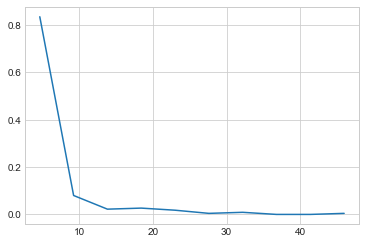

In [23]:
counts, bin_edges = np.histogram(haberman_survival_5['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
plt.plot(bin_edges[1:],pdf);
plt.show()

* CDF can be seen as the cummulative sum of all the data that we got after summing and dividing 
* example, plot of 0.835 can be observed for  4.6 nodes
* this will be added to one [ 0.83555556  0.08        0.02222222  0.02666667  0.01777778  0.00444444
  0.00888889  0.          0.          0.00444444]

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


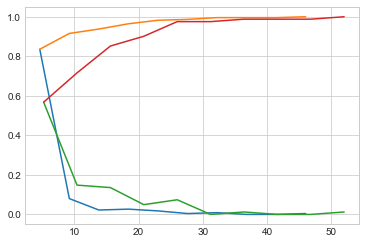

In [24]:
# Plots of CDF of status for diffrent survival check.

# haberman_survival_5 (long survival)
counts, bin_edges = np.histogram(haberman_survival_5['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#haberman_survival_2 (short survival)
counts, bin_edges = np.histogram(haberman_survival_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

# Observation

* Here is a good catch, thanks to CDF and PDF 
* As we said earlier that 83% of people have good chance who have less lymph nodes i.e. < 4
* This can now be proved
* just observer the start line of CDF for haberman_survival_2, it starts at 5.2
* so, people having lymph nodes more than 4 have less chance of survival
* As the number of lymph nodes increases [ 0., 5.2 ,10.4 ,15.6 ,20.8 ,26.  ,31.2 ,36.4 ,41.6 ,46.8 ,52.] the chances of survival decreases


#  Mean, Variance and Std-dev

In [25]:
#mean
print("mean")
#print(np.mean(haberman.nodes))
print(np.mean(haberman_survival_5.nodes))
print(np.mean(haberman_survival_2.nodes))


#std deviation
print("\n")
print("std-dev")
#print(np.std(haberman.nodes))
print(np.std(haberman_survival_5.nodes))
print(np.std(haberman_survival_2.nodes))

mean
2.7911111111111113
7.45679012345679


std-dev
5.857258449412131
9.128776076761632


# Observation

* First we have distinguished the data between two variables (haberman_survival_5, haberman_survival_2)
* haberman_survival_5 have all the data related to survival status for 1 (people survived for more than 5 years) - long survival
* haberman_survival_2 have all the data related to survival status for 2 (people survived for less than 5 years) - sort survival
* We have said that people with less nodes (nodes < 5) have long survival
* Here we took the mean(average) for long survival data and it is 2.79, this means the collected data for long survival when compared with mean for short survival i.e. 7.45 is much less.
* So, we can say that probability of short survival is more in dataset
* The standard deviation for Long survive has only 5.85 and Short survive has 9.12, means the spread of data for short survive is more.


# Median, Percentile, Quantile, IQR, MAD

In [26]:
#median
print("median")
#print(np.median(haberman.nodes))
print(np.median(haberman_survival_5.nodes))
print(np.median(haberman_survival_2.nodes))


#Quantiles
print("\n")
print("Quantiles")
#print(np.percentile(haberman.nodes,np.arange(0,100,25)))
print(np.percentile(haberman_survival_5.nodes,np.arange(0,100,25)))
print(np.percentile(haberman_survival_2.nodes,np.arange(0,100,25)))


#print("\n")
#print("Individual percentile just to undertand")
#print(np.percentile(haberman_survival_5.nodes,25))
#print(np.percentile(haberman_survival_2.nodes,25))
#print(np.percentile(haberman_survival_5.nodes,50))
#print(np.percentile(haberman_survival_2.nodes,50))
#print(np.percentile(haberman_survival_5.nodes,50))
#print(np.percentile(haberman_survival_2.nodes,75))
#print(np.percentile(haberman_survival_5.nodes,75))
#print(np.percentile(haberman_survival_2.nodes,75))

print("\n")
print("90th percentile")
print(np.percentile(haberman_survival_5.nodes,90))
print(np.percentile(haberman_survival_2.nodes,90))

from statsmodels import robust
print("\n")
print ("Median Absolute Deviation")
#print(robust.mad(haberman["nodes"]))
print(robust.mad(haberman_survival_5["nodes"]))
print(robust.mad(haberman_survival_2["nodes"]))




median
0.0
4.0


Quantiles
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]


90th percentile
8.0
20.0


Median Absolute Deviation
0.0
5.930408874022408


# Observations

* #----- Median------#
* average lymph nodes in long survival is 0
* average lymph nodes in short survival is 4
* So, we can conclude that people who have average 4 lymph nodes have short survival 
* #----- Quantiles------#
* The Quantiles are divided in the range of 0,25,50,75
* The Quintiles gives the percentile data; here we can say that 50th% of lymph nodes are 0 in long survival
* The 75th% tell people have less than or equal to 3 lymph nodes
* The remaining 25% people have lymph node greater than 3
* Same can be observed in short survival data, 50%th people have lymph node of 4


# Box plot and Whiskers

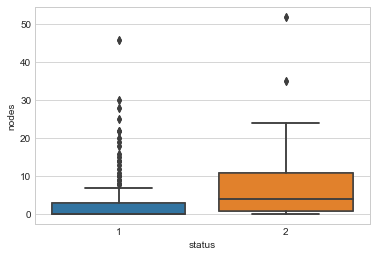

In [27]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='status',y='nodes', data=haberman)
sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()

# Observation

* In Boxplot we use quantiles to plot
* We have already seen that 25th% and 50th% percentile is having the value of 0 and they can be seen same in the plot for long survival
* The interquartile range is not sensitive to outliers
* The Threshold for long survival is 0 to 7 
* In short survival we can see that 50th are nearly same as long Survival i.e. till 75th% percentile of Long Survival
* Threshold for the Short lies from 0 to 25 nodes and 75th% is 12 and 25th% is 1 or 2
* So, we can clearly tell that the data will overlap till 0-7 nodes
* So, we can conclude that there are chances of error for 0-7 nodes, error for short survival data


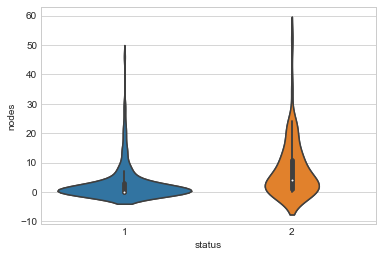

In [28]:
sns.violinplot(x='status',y='nodes', data=haberman)
sns.violinplot(x='status',y='nodes', data=haberman)
plt.show()

# Observation

* In violin plot we see that for long survive the data is surrounded (density) more near the 0 nodes 
* The whiskers range is 0-7 
* And survival status for 2, shows that short survival data is surrounded more from 0–20 and threshold from 0–12


# Conclusion

* We can say that dataset for Haberman’s can be analyzed in using various analytical skill set using SQL, and stats
* We could see SQL and Stats are more in number, so analysis things in graphical presentation will provide more intuition of the data 
* We have also seen that age and nodes were where useful features, but we have could see age getting overlap at some point and nodes played a major role in defining the data set

